In [14]:
#------------------------------mlp-LSTM- GRU- Tracking Models--------------------------

In [1]:
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt


#From Pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix


#From Keras
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM,GRU


#From sklearn 
from sklearn import preprocessing  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split  

from math import sqrt


#Import Files
import math
import time
import pandas as pd #define the data structures
import matplotlib as plt #for visualization
import numpy
import numpy as np #for matrix multiplication
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import seaborn as sns
import plotly.offline as py
import os 
import matplotlib.pyplot as plt


from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler #for normalizing our data(scaling)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split   


from math import sqrt
from numpy import concatenate 
from datetime import datetime
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer

from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_absolute_error,mean_squared_error 

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout


#Import others
py.init_notebook_mode(connected=True)
get_ipython().run_line_magic('matplotlib', 'inline')

Using TensorFlow backend.


In [2]:
#--------------------Read Data------------

In [3]:
#import or read the datasets
df2= pd.read_csv('TrackDataAllReduced.csv',index_col=0)
#df2=df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1)
df2.head()

,UserCode,UAV1,UAV2,UAV3,AP1,AP2,AP3,AP4,AP5,AP6,...,AP29,AP30,CH1,CH2,CH3,CH4,CH5,Hight,X,Y
1.0,101.0,-49.5,-64.4,-67.4,-0.52,6.70,-1.39,0.64,0.29,-0.60,...,0.05,0.04,157.0,157.0,157.0,157.0,157.0,60.0,200.0,1.0
2.0,101.0,-49.1,-66.6,-72.6,3.42,1.83,-1.63,-0.37,-0.30,0.03,...,0.03,-0.16,7.0,157.0,7.0,7.0,157.0,60.0,197.0,1.0
3.0,101.0,-52.9,-67.9,-75.9,4.55,3.17,0.08,0.69,0.63,-0.51,...,-0.23,-0.15,7.0,7.0,7.0,7.0,157.0,60.0,194.0,1.0
4.0,101.0,-49.5,-67.5,-72.5,3.25,2.06,-0.88,0.80,0.31,-0.11,...,0.01,-0.09,7.0,7.0,157.0,1.0,7.0,60.0,191.0,1.0
5.0,101.0,-50.0,-66.1,-76.1,5.04,1.39,-0.57,-0.03,-0.10,-0.15,...,0.09,0.07,7.0,1.0,157.0,7.0,2.0,60.0,188.0,1.0


In [4]:
Y=df2.iloc[:,-2:]
X=df2.iloc[:,:-2]

# conversion to numpy array
x, y = X.values, Y.values  

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler() 


X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y)   
print(len(X),len(Y))

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) 
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

23445 23445


In [5]:
X_train, y_train= X, Y 
print(X_train.shape, y_train.shape)

(23445, 40) (23445, 2)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [7]:
#import or read the datasets
pred = pd.read_csv('TestReduced.csv',index_col=0)
#pred=pred2.drop(pred2.columns[pred2.columns.str.contains('unnamed',case = False)],axis = 1)
pred.head()

,UserCode,UAV1,UAV2,UAV3,AP1,AP2,AP3,AP4,AP5,AP6,...,AP29,AP30,CH1,CH2,CH3,CH4,CH5,Hight,X,Y
1,104,-48.3,-74.7,-67.0,7.53,0.62,1.51,0.68,-0.02,-0.65,...,-0.26,-0.17,1,11,153,6,6,40,1,6
2,104,-54.3,-82.1,-78.6,6.16,-0.31,-0.08,0.62,0.34,-1.20,...,-0.21,0.50,1,11,6,3,8,40,1,12
3,111,-82.1,-70.8,-80.8,7.73,-0.28,1.25,0.18,-1.15,0.30,...,0.50,-0.35,1,1,1,1,6,60,1,15
4,103,-76.5,-78.8,-82.8,6.97,-0.23,-0.17,2.18,0.08,-0.98,...,0.34,-0.86,3,3,3,3,100,60,1,21
5,115,-48.3,-75.6,-73.5,5.17,1.16,0.96,1.47,1.43,-0.37,...,-0.33,-0.58,11,11,1,153,2,40,1,24


In [8]:
X_pred=pred.iloc[:,:-2]
Y_pred=pred.iloc[:,-2:]
x_pred, y_pred = X_pred.values, Y_pred.values  

# scaling values for model
x_pred_scale = MinMaxScaler()
y_pred_scale = MinMaxScaler() 

Xx__pred = x_pred_scale.fit_transform(x_pred)
Yy_pred = y_pred_scale.fit_transform(y_pred) 

C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [9]:
pred_x = np.reshape(Xx__pred, (Xx__pred.shape[0], 1, Xx__pred.shape[1])) 
pred_x

array([[[0.21428571, 0.75877193, 0.17165669, ..., 0.02941176,
         0.03030303, 0.        ]],

       [[0.21428571, 0.62719298, 0.0239521 , ..., 0.01176471,
         0.04242424, 0.        ]],

       [[0.71428571, 0.01754386, 0.249501  , ..., 0.        ,
         0.03030303, 1.        ]],

       ...,

       [[0.5       , 0.73684211, 0.58283433, ..., 0.92941176,
         0.10909091, 0.        ]],

       [[1.        , 0.75877193, 0.67664671, ..., 0.88235294,
         0.69090909, 1.        ]],

       [[0.42857143, 0.75877193, 0.66866267, ..., 0.81176471,
         0.95757576, 1.        ]]])

In [10]:
#-----------------------------GRU model defining--------------------------------

In [11]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name3 = 'Tracking_GRU_' 
    model3='gru'
    model3 = Sequential()
    model3.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model3.add(Dropout(0.2))
    model3.add(GRU(units=256))
    model3.add(Dropout(0.2))
    model3.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model3.compile(loss='MAE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model3

In [12]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name4 = 'Tracking_GRU_' 
    model4='gru'
    model4 = Sequential()
    model4.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model4.add(Dropout(0.2))
    model4.add(GRU(units=256,return_sequences=True))
    model4.add(Dropout(0.2))
    model4.add(GRU(units=256))
    model4.add(Dropout(0.2))
    model4.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model4.compile(loss='MAE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model4

In [13]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name5 = 'Tracking_GRU_' 
    model5='gru'
    model5 = Sequential()
    model5.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model5.add(Dropout(0.2))
    model5.add(GRU(units=256,return_sequences=True))
    model5.add(Dropout(0.2))
    model5.add(GRU(units=256,return_sequences=True))
    model5.add(Dropout(0.2))
    model5.add(GRU(units=256))
    model5.add(Dropout(0.2))
    model5.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model5.compile(loss='MAE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model5

In [16]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name6 = 'Tracking_GRU_' 
    model6='gru'
    model6 = Sequential()
    model6.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256,return_sequences=True))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256,return_sequences=True))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256,return_sequences=True))
    model6.add(Dropout(0.2))
    model6.add(GRU(units=256))
    model6.add(Dropout(0.2))
    model6.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model6.compile(loss='MAE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model6

In [17]:
model3=gru(X_train.shape[2])
model3.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, None, 512)         849408    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
gru_4 (GRU)                  (None, None, 256)         590592    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
gru_5 (GRU)                  (None, None, 256)         393984    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
gru_6 (GRU)                  (None, None, 256)         393984    

In [18]:
model4=gru(X_train.shape[2])
model4.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, None, 512)         849408    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
gru_9 (GRU)                  (None, None, 256)         590592    
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
gru_10 (GRU)                 (None, None, 256)         393984    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_11 (GRU)                 (None, None, 256)         393984    

In [19]:
model5=gru(X_train.shape[2])
model5.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_14 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_14 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_15 (GRU)                 (None, None, 256)         393984    
_________________________________________________________________
dropout_15 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_16 (GRU)                 (None, None, 256)         393984    

In [20]:
model6=gru(X_train.shape[2])
model6.summary()

(None, 40)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, None, 512)         849408    
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_19 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_20 (GRU)                 (None, None, 256)         393984    
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_21 (GRU)                 (None, None, 256)         393984    

In [21]:
##Fitting the GRU to the Training set
hist3=model3.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 23s 1ms/step - loss: 0.2357 - acc: 0.7503 - val_loss: 0.2208 - val_acc: 0.7298
Epoch 2/500
22272/22272 [==============================] - 18s 827us/step - loss: 0.2125 - acc: 0.7504 - val_loss: 0.2155 - val_acc: 0.7212
Epoch 3/500
22272/22272 [==============================] - 16s 700us/step - loss: 0.2047 - acc: 0.7461 - val_loss: 0.2042 - val_acc: 0.7289
Epoch 4/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.1994 - acc: 0.7532 - val_loss: 0.2025 - val_acc: 0.7323
Epoch 5/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1974 - acc: 0.7566 - val_loss: 0.2040 - val_acc: 0.6939
Epoch 6/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.1964 - acc: 0.7545 - val_loss: 0.2028 - val_acc: 0.7460
Epoch 7/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.1924 - acc: 0.7538 - val_loss

Epoch 59/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.1171 - acc: 0.8564 - val_loss: 0.1169 - val_acc: 0.8627
Epoch 60/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.1162 - acc: 0.8565 - val_loss: 0.1196 - val_acc: 0.8576
Epoch 61/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.1162 - acc: 0.8576 - val_loss: 0.1116 - val_acc: 0.8687
Epoch 62/500
22272/22272 [==============================] - 16s 700us/step - loss: 0.1152 - acc: 0.8619 - val_loss: 0.1140 - val_acc: 0.8670
Epoch 63/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.1136 - acc: 0.8632 - val_loss: 0.1135 - val_acc: 0.8627
Epoch 64/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.1127 - acc: 0.8628 - val_loss: 0.1192 - val_acc: 0.8593
Epoch 65/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.1111 - acc: 0.8668 - val_loss: 0.1140 - val_acc: 0.8602
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0709 - acc: 0.9266 - val_loss: 0.0663 - val_acc: 0.9327
Epoch 118/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0708 - acc: 0.9275 - val_loss: 0.0676 - val_acc: 0.9335
Epoch 119/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0694 - acc: 0.9293 - val_loss: 0.0655 - val_acc: 0.9292
Epoch 120/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0701 - acc: 0.9269 - val_loss: 0.0661 - val_acc: 0.9292
Epoch 121/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0691 - acc: 0.9284 - val_loss: 0.0663 - val_acc: 0.9327
Epoch 122/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0691 - acc: 0.9273 - val_loss: 0.0680 - val_acc: 0.9292
Epoch 123/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0687 - acc: 0.9288 - val_loss: 0.0670 - val_acc: 0.9267
Epoch 

Epoch 175/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0486 - acc: 0.9595 - val_loss: 0.0480 - val_acc: 0.9488
Epoch 176/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0483 - acc: 0.9591 - val_loss: 0.0409 - val_acc: 0.9599
Epoch 177/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0481 - acc: 0.9594 - val_loss: 0.0441 - val_acc: 0.9540
Epoch 178/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0477 - acc: 0.9589 - val_loss: 0.0405 - val_acc: 0.9599
Epoch 179/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0479 - acc: 0.9595 - val_loss: 0.0458 - val_acc: 0.9523
Epoch 180/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0473 - acc: 0.9622 - val_loss: 0.0420 - val_acc: 0.9582
Epoch 181/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0471 - acc: 0.9612 - val_loss: 0.0421 - val_acc: 0.9625
Epoch 

Epoch 233/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0371 - acc: 0.9726 - val_loss: 0.0332 - val_acc: 0.9668
Epoch 234/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0374 - acc: 0.9733 - val_loss: 0.0299 - val_acc: 0.9736
Epoch 235/500
22272/22272 [==============================] - 15s 676us/step - loss: 0.0366 - acc: 0.9732 - val_loss: 0.0308 - val_acc: 0.9744
Epoch 236/500
22272/22272 [==============================] - 15s 676us/step - loss: 0.0369 - acc: 0.9731 - val_loss: 0.0307 - val_acc: 0.9770
Epoch 237/500
22272/22272 [==============================] - 15s 678us/step - loss: 0.0367 - acc: 0.9746 - val_loss: 0.0308 - val_acc: 0.9736
Epoch 238/500
22272/22272 [==============================] - 15s 676us/step - loss: 0.0365 - acc: 0.9743 - val_loss: 0.0313 - val_acc: 0.9710
Epoch 239/500
22272/22272 [==============================] - 15s 678us/step - loss: 0.0370 - acc: 0.9736 - val_loss: 0.0290 - val_acc: 0.9753
Epoch 

Epoch 291/500
22272/22272 [==============================] - 15s 674us/step - loss: 0.0315 - acc: 0.9783 - val_loss: 0.0276 - val_acc: 0.9761
Epoch 292/500
22272/22272 [==============================] - 15s 675us/step - loss: 0.0317 - acc: 0.9784 - val_loss: 0.0261 - val_acc: 0.9761
Epoch 293/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0312 - acc: 0.9791 - val_loss: 0.0261 - val_acc: 0.9736
Epoch 294/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0306 - acc: 0.9780 - val_loss: 0.0253 - val_acc: 0.9812
Epoch 295/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0303 - acc: 0.9787 - val_loss: 0.0242 - val_acc: 0.9795
Epoch 296/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0309 - acc: 0.9791 - val_loss: 0.0251 - val_acc: 0.9761
Epoch 297/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0310 - acc: 0.9781 - val_loss: 0.0252 - val_acc: 0.9736
Epoch 

Epoch 349/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0278 - acc: 0.9809 - val_loss: 0.0220 - val_acc: 0.9787
Epoch 350/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0273 - acc: 0.9818 - val_loss: 0.0221 - val_acc: 0.9787
Epoch 351/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0264 - acc: 0.9819 - val_loss: 0.0204 - val_acc: 0.9804
Epoch 352/500
22272/22272 [==============================] - 16s 701us/step - loss: 0.0273 - acc: 0.9813 - val_loss: 0.0240 - val_acc: 0.9812
Epoch 353/500
22272/22272 [==============================] - 15s 687us/step - loss: 0.0271 - acc: 0.9816 - val_loss: 0.0207 - val_acc: 0.9829
Epoch 354/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0268 - acc: 0.9828 - val_loss: 0.0202 - val_acc: 0.9872
Epoch 355/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0265 - acc: 0.9817 - val_loss: 0.0208 - val_acc: 0.9812
Epoch 

22272/22272 [==============================] - 15s 681us/step - loss: 0.0242 - acc: 0.9852 - val_loss: 0.0186 - val_acc: 0.9838
Epoch 407/500
22272/22272 [==============================] - 15s 676us/step - loss: 0.0245 - acc: 0.9841 - val_loss: 0.0183 - val_acc: 0.9838
Epoch 408/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0243 - acc: 0.9837 - val_loss: 0.0185 - val_acc: 0.9804
Epoch 409/500
22272/22272 [==============================] - 15s 678us/step - loss: 0.0245 - acc: 0.9842 - val_loss: 0.0185 - val_acc: 0.9787
Epoch 410/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0240 - acc: 0.9842 - val_loss: 0.0184 - val_acc: 0.9838
Epoch 411/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0242 - acc: 0.9835 - val_loss: 0.0204 - val_acc: 0.9804
Epoch 412/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0243 - acc: 0.9840 - val_loss: 0.0196 - val_acc: 0.9847
Epoch 413/500
22272/

Epoch 464/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0226 - acc: 0.9864 - val_loss: 0.0166 - val_acc: 0.9847
Epoch 465/500
22272/22272 [==============================] - 15s 679us/step - loss: 0.0228 - acc: 0.9859 - val_loss: 0.0157 - val_acc: 0.9838
Epoch 466/500
22272/22272 [==============================] - 16s 704us/step - loss: 0.0223 - acc: 0.9857 - val_loss: 0.0156 - val_acc: 0.9855
Epoch 467/500
22272/22272 [==============================] - 16s 735us/step - loss: 0.0227 - acc: 0.9846 - val_loss: 0.0172 - val_acc: 0.9829
Epoch 468/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0227 - acc: 0.9854 - val_loss: 0.0161 - val_acc: 0.9889
Epoch 469/500
22272/22272 [==============================] - 15s 677us/step - loss: 0.0227 - acc: 0.9866 - val_loss: 0.0164 - val_acc: 0.9898
Epoch 470/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0227 - acc: 0.9857 - val_loss: 0.0168 - val_acc: 0.9847
Epoch 

In [22]:
##Fitting the GRU to the Training set
hist4=model4.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 19s 860us/step - loss: 0.2413 - acc: 0.7489 - val_loss: 0.2232 - val_acc: 0.7255
Epoch 2/500
22272/22272 [==============================] - 15s 687us/step - loss: 0.2123 - acc: 0.7466 - val_loss: 0.2114 - val_acc: 0.7170
Epoch 3/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.2022 - acc: 0.7481 - val_loss: 0.2046 - val_acc: 0.7289
Epoch 4/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1987 - acc: 0.7531 - val_loss: 0.2020 - val_acc: 0.7323
Epoch 5/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.1967 - acc: 0.7546 - val_loss: 0.2027 - val_acc: 0.7417
Epoch 6/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.1950 - acc: 0.7585 - val_loss: 0.2005 - val_acc: 0.7340
Epoch 7/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.1953 - acc: 0.7542 - val_lo

Epoch 59/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.1194 - acc: 0.8526 - val_loss: 0.1199 - val_acc: 0.8585
Epoch 60/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.1181 - acc: 0.8571 - val_loss: 0.1221 - val_acc: 0.8483
Epoch 61/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.1181 - acc: 0.8554 - val_loss: 0.1180 - val_acc: 0.8508
Epoch 62/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.1147 - acc: 0.8595 - val_loss: 0.1197 - val_acc: 0.8372
Epoch 63/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1152 - acc: 0.8600 - val_loss: 0.1222 - val_acc: 0.8508
Epoch 64/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.1130 - acc: 0.8653 - val_loss: 0.1121 - val_acc: 0.8576
Epoch 65/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.1124 - acc: 0.8630 - val_loss: 0.1115 - val_acc: 0.8636
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0719 - acc: 0.9238 - val_loss: 0.0647 - val_acc: 0.9241
Epoch 118/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0707 - acc: 0.9238 - val_loss: 0.0713 - val_acc: 0.9241
Epoch 119/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0696 - acc: 0.9251 - val_loss: 0.0650 - val_acc: 0.9284
Epoch 120/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0683 - acc: 0.9276 - val_loss: 0.0661 - val_acc: 0.9292
Epoch 121/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0690 - acc: 0.9261 - val_loss: 0.0677 - val_acc: 0.9224
Epoch 122/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0683 - acc: 0.9300 - val_loss: 0.0632 - val_acc: 0.9335
Epoch 123/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0676 - acc: 0.9322 - val_loss: 0.0640 - val_acc: 0.9284
Epoch 

Epoch 175/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0490 - acc: 0.9578 - val_loss: 0.0443 - val_acc: 0.9625
Epoch 176/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0482 - acc: 0.9589 - val_loss: 0.0414 - val_acc: 0.9650
Epoch 177/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0482 - acc: 0.9561 - val_loss: 0.0415 - val_acc: 0.9591
Epoch 178/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0468 - acc: 0.9599 - val_loss: 0.0421 - val_acc: 0.9608
Epoch 179/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.0475 - acc: 0.9605 - val_loss: 0.0424 - val_acc: 0.9608
Epoch 180/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0469 - acc: 0.9600 - val_loss: 0.0394 - val_acc: 0.9591
Epoch 181/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0464 - acc: 0.9598 - val_loss: 0.0413 - val_acc: 0.9582
Epoch 

Epoch 233/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0375 - acc: 0.9712 - val_loss: 0.0293 - val_acc: 0.9744
Epoch 234/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0379 - acc: 0.9704 - val_loss: 0.0313 - val_acc: 0.9761
Epoch 235/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0375 - acc: 0.9718 - val_loss: 0.0317 - val_acc: 0.9727
Epoch 236/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.0378 - acc: 0.9704 - val_loss: 0.0306 - val_acc: 0.9736
Epoch 237/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0371 - acc: 0.9723 - val_loss: 0.0320 - val_acc: 0.9719
Epoch 238/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0373 - acc: 0.9693 - val_loss: 0.0295 - val_acc: 0.9795
Epoch 239/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.0371 - acc: 0.9710 - val_loss: 0.0300 - val_acc: 0.9736
Epoch 

Epoch 291/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0312 - acc: 0.9780 - val_loss: 0.0232 - val_acc: 0.9804
Epoch 292/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0320 - acc: 0.9760 - val_loss: 0.0247 - val_acc: 0.9753
Epoch 293/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0318 - acc: 0.9776 - val_loss: 0.0276 - val_acc: 0.9736
Epoch 294/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0306 - acc: 0.9786 - val_loss: 0.0238 - val_acc: 0.9795
Epoch 295/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0318 - acc: 0.9765 - val_loss: 0.0250 - val_acc: 0.9812
Epoch 296/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0318 - acc: 0.9760 - val_loss: 0.0259 - val_acc: 0.9770
Epoch 297/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0318 - acc: 0.9763 - val_loss: 0.0281 - val_acc: 0.9770
Epoch 

Epoch 349/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0278 - acc: 0.9807 - val_loss: 0.0205 - val_acc: 0.9821
Epoch 350/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0275 - acc: 0.9800 - val_loss: 0.0210 - val_acc: 0.9838
Epoch 351/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0274 - acc: 0.9801 - val_loss: 0.0205 - val_acc: 0.9821
Epoch 352/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0278 - acc: 0.9804 - val_loss: 0.0208 - val_acc: 0.9770
Epoch 353/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0277 - acc: 0.9801 - val_loss: 0.0210 - val_acc: 0.9778
Epoch 354/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0277 - acc: 0.9807 - val_loss: 0.0202 - val_acc: 0.9812
Epoch 355/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0271 - acc: 0.9808 - val_loss: 0.0199 - val_acc: 0.9821
Epoch 

Epoch 407/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0255 - acc: 0.9821 - val_loss: 0.0175 - val_acc: 0.9829
Epoch 408/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0249 - acc: 0.9824 - val_loss: 0.0193 - val_acc: 0.9795
Epoch 409/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0253 - acc: 0.9820 - val_loss: 0.0186 - val_acc: 0.9795
Epoch 410/500
22272/22272 [==============================] - 15s 681us/step - loss: 0.0248 - acc: 0.9835 - val_loss: 0.0189 - val_acc: 0.9829
Epoch 411/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0244 - acc: 0.9833 - val_loss: 0.0203 - val_acc: 0.9838
Epoch 412/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0250 - acc: 0.9824 - val_loss: 0.0208 - val_acc: 0.9838
Epoch 413/500
22272/22272 [==============================] - 15s 683us/step - loss: 0.0249 - acc: 0.9825 - val_loss: 0.0201 - val_acc: 0.9829
Epoch 

Epoch 465/500
22272/22272 [==============================] - 15s 684us/step - loss: 0.0230 - acc: 0.9857 - val_loss: 0.0164 - val_acc: 0.9829
Epoch 466/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0227 - acc: 0.9844 - val_loss: 0.0160 - val_acc: 0.9864
Epoch 467/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0230 - acc: 0.9847 - val_loss: 0.0170 - val_acc: 0.9812
Epoch 468/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0228 - acc: 0.9848 - val_loss: 0.0163 - val_acc: 0.9847
Epoch 469/500
22272/22272 [==============================] - 15s 680us/step - loss: 0.0230 - acc: 0.9853 - val_loss: 0.0167 - val_acc: 0.9864
Epoch 470/500
22272/22272 [==============================] - 15s 682us/step - loss: 0.0231 - acc: 0.9838 - val_loss: 0.0163 - val_acc: 0.9821
Epoch 471/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0227 - acc: 0.9846 - val_loss: 0.0177 - val_acc: 0.9812
Epoch 

In [23]:
##Fitting the GRU to the Training set
hist5=model5.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 20s 890us/step - loss: 0.2397 - acc: 0.7434 - val_loss: 0.2234 - val_acc: 0.7298
Epoch 2/500
22272/22272 [==============================] - 16s 704us/step - loss: 0.2128 - acc: 0.7503 - val_loss: 0.2147 - val_acc: 0.7263
Epoch 3/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.2037 - acc: 0.7454 - val_loss: 0.2059 - val_acc: 0.7340
Epoch 4/500
22272/22272 [==============================] - 16s 714us/step - loss: 0.2000 - acc: 0.7506 - val_loss: 0.2045 - val_acc: 0.7315
Epoch 5/500
22272/22272 [==============================] - 16s 711us/step - loss: 0.1967 - acc: 0.7528 - val_loss: 0.2035 - val_acc: 0.7425
Epoch 6/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.1955 - acc: 0.7534 - val_loss: 0.1972 - val_acc: 0.7460
Epoch 7/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.1934 - acc: 0.7526 - val_lo

Epoch 59/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1182 - acc: 0.8542 - val_loss: 0.1346 - val_acc: 0.8372
Epoch 60/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1166 - acc: 0.8576 - val_loss: 0.1200 - val_acc: 0.8474
Epoch 61/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.1182 - acc: 0.8566 - val_loss: 0.1259 - val_acc: 0.8414
Epoch 62/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.1165 - acc: 0.8598 - val_loss: 0.1199 - val_acc: 0.8465
Epoch 63/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.1144 - acc: 0.8588 - val_loss: 0.1123 - val_acc: 0.8576
Epoch 64/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.1136 - acc: 0.8622 - val_loss: 0.1132 - val_acc: 0.8500
Epoch 65/500
22272/22272 [==============================] - 16s 696us/step - loss: 0.1128 - acc: 0.8632 - val_loss: 0.1118 - val_acc: 0.8653
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.0715 - acc: 0.9234 - val_loss: 0.0691 - val_acc: 0.9267
Epoch 118/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0708 - acc: 0.9246 - val_loss: 0.0710 - val_acc: 0.9284
Epoch 119/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0692 - acc: 0.9299 - val_loss: 0.0674 - val_acc: 0.9335
Epoch 120/500
22272/22272 [==============================] - 16s 710us/step - loss: 0.0696 - acc: 0.9282 - val_loss: 0.0644 - val_acc: 0.9352
Epoch 121/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0689 - acc: 0.9267 - val_loss: 0.0624 - val_acc: 0.9361
Epoch 122/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0688 - acc: 0.9279 - val_loss: 0.0684 - val_acc: 0.9361
Epoch 123/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0691 - acc: 0.9270 - val_loss: 0.0646 - val_acc: 0.9369
Epoch 

Epoch 175/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0492 - acc: 0.9571 - val_loss: 0.0445 - val_acc: 0.9574
Epoch 176/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0487 - acc: 0.9573 - val_loss: 0.0444 - val_acc: 0.9582
Epoch 177/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0478 - acc: 0.9588 - val_loss: 0.0443 - val_acc: 0.9582
Epoch 178/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.0478 - acc: 0.9582 - val_loss: 0.0439 - val_acc: 0.9642
Epoch 179/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0478 - acc: 0.9576 - val_loss: 0.0408 - val_acc: 0.9676
Epoch 180/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0480 - acc: 0.9572 - val_loss: 0.0554 - val_acc: 0.9420
Epoch 181/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0481 - acc: 0.9572 - val_loss: 0.0458 - val_acc: 0.9642
Epoch 

Epoch 233/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0381 - acc: 0.9700 - val_loss: 0.0327 - val_acc: 0.9668
Epoch 234/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0378 - acc: 0.9697 - val_loss: 0.0366 - val_acc: 0.9668
Epoch 235/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0384 - acc: 0.9701 - val_loss: 0.0348 - val_acc: 0.9770
Epoch 236/500
22272/22272 [==============================] - 16s 696us/step - loss: 0.0374 - acc: 0.9715 - val_loss: 0.0329 - val_acc: 0.9761
Epoch 237/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0374 - acc: 0.9703 - val_loss: 0.0330 - val_acc: 0.9702
Epoch 238/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.0376 - acc: 0.9709 - val_loss: 0.0333 - val_acc: 0.9744
Epoch 239/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0370 - acc: 0.9727 - val_loss: 0.0326 - val_acc: 0.9795
Epoch 

Epoch 291/500
22272/22272 [==============================] - 16s 698us/step - loss: 0.0308 - acc: 0.9790 - val_loss: 0.0253 - val_acc: 0.9787
Epoch 292/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0311 - acc: 0.9766 - val_loss: 0.0278 - val_acc: 0.9761
Epoch 293/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.0313 - acc: 0.9770 - val_loss: 0.0282 - val_acc: 0.9795
Epoch 294/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0318 - acc: 0.9767 - val_loss: 0.0271 - val_acc: 0.9770
Epoch 295/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0316 - acc: 0.9774 - val_loss: 0.0277 - val_acc: 0.9744
Epoch 296/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0312 - acc: 0.9767 - val_loss: 0.0269 - val_acc: 0.9770
Epoch 297/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0311 - acc: 0.9775 - val_loss: 0.0268 - val_acc: 0.9804
Epoch 

Epoch 349/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0278 - acc: 0.9808 - val_loss: 0.0211 - val_acc: 0.9847
Epoch 350/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0274 - acc: 0.9813 - val_loss: 0.0231 - val_acc: 0.9812
Epoch 351/500
22272/22272 [==============================] - 15s 686us/step - loss: 0.0278 - acc: 0.9813 - val_loss: 0.0222 - val_acc: 0.9812
Epoch 352/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.0275 - acc: 0.9811 - val_loss: 0.0226 - val_acc: 0.9812
Epoch 353/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0269 - acc: 0.9823 - val_loss: 0.0227 - val_acc: 0.9821
Epoch 354/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0276 - acc: 0.9806 - val_loss: 0.0238 - val_acc: 0.9787
Epoch 355/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0271 - acc: 0.9820 - val_loss: 0.0214 - val_acc: 0.9821
Epoch 

Epoch 407/500
22272/22272 [==============================] - 15s 685us/step - loss: 0.0250 - acc: 0.9833 - val_loss: 0.0221 - val_acc: 0.9847
Epoch 408/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0250 - acc: 0.9828 - val_loss: 0.0216 - val_acc: 0.9812
Epoch 409/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0254 - acc: 0.9825 - val_loss: 0.0200 - val_acc: 0.9898
Epoch 410/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0254 - acc: 0.9818 - val_loss: 0.0198 - val_acc: 0.9829
Epoch 411/500
22272/22272 [==============================] - 15s 688us/step - loss: 0.0251 - acc: 0.9822 - val_loss: 0.0217 - val_acc: 0.9872
Epoch 412/500
22272/22272 [==============================] - 15s 696us/step - loss: 0.0254 - acc: 0.9822 - val_loss: 0.0214 - val_acc: 0.9872
Epoch 413/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0255 - acc: 0.9824 - val_loss: 0.0203 - val_acc: 0.9881
Epoch 

Epoch 465/500
22272/22272 [==============================] - 25s 1ms/step - loss: 0.0230 - acc: 0.9847 - val_loss: 0.0196 - val_acc: 0.9881
Epoch 466/500
22272/22272 [==============================] - 25s 1ms/step - loss: 0.0232 - acc: 0.9838 - val_loss: 0.0181 - val_acc: 0.9855
Epoch 467/500
22272/22272 [==============================] - 26s 1ms/step - loss: 0.0234 - acc: 0.9842 - val_loss: 0.0205 - val_acc: 0.9804
Epoch 468/500
22272/22272 [==============================] - 26s 1ms/step - loss: 0.0235 - acc: 0.9826 - val_loss: 0.0210 - val_acc: 0.9812
Epoch 469/500
22272/22272 [==============================] - 25s 1ms/step - loss: 0.0230 - acc: 0.9847 - val_loss: 0.0193 - val_acc: 0.9872
Epoch 470/500
22272/22272 [==============================] - 25s 1ms/step - loss: 0.0226 - acc: 0.9855 - val_loss: 0.0186 - val_acc: 0.9906
Epoch 471/500
22272/22272 [==============================] - 25s 1ms/step - loss: 0.0235 - acc: 0.9833 - val_loss: 0.0198 - val_acc: 0.9864
Epoch 472/500
22272/

In [24]:
##Fitting the GRU to the Training set
hist6=model6.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 22272 samples, validate on 1173 samples
Epoch 1/500
22272/22272 [==============================] - 33s 1ms/step - loss: 0.2408 - acc: 0.7491 - val_loss: 0.2221 - val_acc: 0.7289
Epoch 2/500
22272/22272 [==============================] - 20s 917us/step - loss: 0.2105 - acc: 0.7486 - val_loss: 0.2084 - val_acc: 0.7255
Epoch 3/500
22272/22272 [==============================] - 16s 699us/step - loss: 0.2019 - acc: 0.7512 - val_loss: 0.2043 - val_acc: 0.7366
Epoch 4/500
22272/22272 [==============================] - 16s 698us/step - loss: 0.1990 - acc: 0.7562 - val_loss: 0.2018 - val_acc: 0.7349
Epoch 5/500
22272/22272 [==============================] - 16s 698us/step - loss: 0.1968 - acc: 0.7560 - val_loss: 0.2032 - val_acc: 0.7460
Epoch 6/500
22272/22272 [==============================] - 16s 704us/step - loss: 0.1946 - acc: 0.7538 - val_loss: 0.1980 - val_acc: 0.7425
Epoch 7/500
22272/22272 [==============================] - 16s 699us/step - loss: 0.1923 - acc: 0.7516 - val_loss

Epoch 59/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.1184 - acc: 0.8539 - val_loss: 0.1196 - val_acc: 0.8517
Epoch 60/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.1167 - acc: 0.8573 - val_loss: 0.1177 - val_acc: 0.8491
Epoch 61/500
22272/22272 [==============================] - 16s 727us/step - loss: 0.1174 - acc: 0.8563 - val_loss: 0.1186 - val_acc: 0.8559
Epoch 62/500
22272/22272 [==============================] - 16s 701us/step - loss: 0.1154 - acc: 0.8609 - val_loss: 0.1190 - val_acc: 0.8465
Epoch 63/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.1129 - acc: 0.8640 - val_loss: 0.1155 - val_acc: 0.8593
Epoch 64/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.1125 - acc: 0.8645 - val_loss: 0.1173 - val_acc: 0.8457
Epoch 65/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.1115 - acc: 0.8646 - val_loss: 0.1114 - val_acc: 0.8619
Epoch 66/500


Epoch 117/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.0714 - acc: 0.9237 - val_loss: 0.0719 - val_acc: 0.9224
Epoch 118/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0701 - acc: 0.9250 - val_loss: 0.0669 - val_acc: 0.9258
Epoch 119/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0686 - acc: 0.9286 - val_loss: 0.0665 - val_acc: 0.9250
Epoch 120/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0690 - acc: 0.9251 - val_loss: 0.0646 - val_acc: 0.9335
Epoch 121/500
22272/22272 [==============================] - 16s 704us/step - loss: 0.0695 - acc: 0.9253 - val_loss: 0.0690 - val_acc: 0.9301
Epoch 122/500
22272/22272 [==============================] - 16s 698us/step - loss: 0.0675 - acc: 0.9292 - val_loss: 0.0712 - val_acc: 0.9224
Epoch 123/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0683 - acc: 0.9302 - val_loss: 0.0627 - val_acc: 0.9395
Epoch 

Epoch 175/500
22272/22272 [==============================] - 16s 697us/step - loss: 0.0482 - acc: 0.9589 - val_loss: 0.0455 - val_acc: 0.9548
Epoch 176/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.0484 - acc: 0.9575 - val_loss: 0.0477 - val_acc: 0.9531
Epoch 177/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0491 - acc: 0.9555 - val_loss: 0.0436 - val_acc: 0.9591
Epoch 178/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0491 - acc: 0.9577 - val_loss: 0.0479 - val_acc: 0.9497
Epoch 179/500
22272/22272 [==============================] - 15s 696us/step - loss: 0.0479 - acc: 0.9582 - val_loss: 0.0470 - val_acc: 0.9565
Epoch 180/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0471 - acc: 0.9578 - val_loss: 0.0428 - val_acc: 0.9582
Epoch 181/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0471 - acc: 0.9592 - val_loss: 0.0446 - val_acc: 0.9557
Epoch 

Epoch 233/500
22272/22272 [==============================] - 16s 703us/step - loss: 0.0374 - acc: 0.9728 - val_loss: 0.0323 - val_acc: 0.9753
Epoch 234/500
22272/22272 [==============================] - 16s 699us/step - loss: 0.0367 - acc: 0.9728 - val_loss: 0.0318 - val_acc: 0.9761
Epoch 235/500
22272/22272 [==============================] - 16s 700us/step - loss: 0.0374 - acc: 0.9712 - val_loss: 0.0332 - val_acc: 0.9719
Epoch 236/500
22272/22272 [==============================] - 16s 699us/step - loss: 0.0376 - acc: 0.9732 - val_loss: 0.0362 - val_acc: 0.9574
Epoch 237/500
22272/22272 [==============================] - 16s 715us/step - loss: 0.0369 - acc: 0.9715 - val_loss: 0.0327 - val_acc: 0.9693
Epoch 238/500
22272/22272 [==============================] - 16s 709us/step - loss: 0.0367 - acc: 0.9722 - val_loss: 0.0318 - val_acc: 0.9710
Epoch 239/500
22272/22272 [==============================] - 16s 696us/step - loss: 0.0358 - acc: 0.9732 - val_loss: 0.0305 - val_acc: 0.9710
Epoch 

Epoch 291/500
22272/22272 [==============================] - 16s 736us/step - loss: 0.0312 - acc: 0.9783 - val_loss: 0.0275 - val_acc: 0.9795
Epoch 292/500
22272/22272 [==============================] - 16s 696us/step - loss: 0.0309 - acc: 0.9777 - val_loss: 0.0264 - val_acc: 0.9829
Epoch 293/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0311 - acc: 0.9766 - val_loss: 0.0265 - val_acc: 0.9804
Epoch 294/500
22272/22272 [==============================] - 15s 689us/step - loss: 0.0306 - acc: 0.9804 - val_loss: 0.0256 - val_acc: 0.9821
Epoch 295/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0312 - acc: 0.9764 - val_loss: 0.0248 - val_acc: 0.9812
Epoch 296/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0307 - acc: 0.9767 - val_loss: 0.0260 - val_acc: 0.9804
Epoch 297/500
22272/22272 [==============================] - 16s 698us/step - loss: 0.0306 - acc: 0.9798 - val_loss: 0.0268 - val_acc: 0.9787
Epoch 

Epoch 349/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0278 - acc: 0.9803 - val_loss: 0.0243 - val_acc: 0.9812
Epoch 350/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0271 - acc: 0.9813 - val_loss: 0.0238 - val_acc: 0.9847
Epoch 351/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0272 - acc: 0.9812 - val_loss: 0.0230 - val_acc: 0.9812
Epoch 352/500
22272/22272 [==============================] - 16s 708us/step - loss: 0.0274 - acc: 0.9816 - val_loss: 0.0226 - val_acc: 0.9812
Epoch 353/500
22272/22272 [==============================] - 16s 699us/step - loss: 0.0273 - acc: 0.9812 - val_loss: 0.0235 - val_acc: 0.9804
Epoch 354/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0271 - acc: 0.9812 - val_loss: 0.0222 - val_acc: 0.9829
Epoch 355/500
22272/22272 [==============================] - 15s 690us/step - loss: 0.0277 - acc: 0.9810 - val_loss: 0.0257 - val_acc: 0.9770
Epoch 

Epoch 407/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0252 - acc: 0.9819 - val_loss: 0.0212 - val_acc: 0.9795
Epoch 408/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0247 - acc: 0.9823 - val_loss: 0.0212 - val_acc: 0.9821
Epoch 409/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0246 - acc: 0.9833 - val_loss: 0.0198 - val_acc: 0.9838
Epoch 410/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0250 - acc: 0.9822 - val_loss: 0.0225 - val_acc: 0.9821
Epoch 411/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0248 - acc: 0.9826 - val_loss: 0.0202 - val_acc: 0.9855
Epoch 412/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0249 - acc: 0.9842 - val_loss: 0.0208 - val_acc: 0.9804
Epoch 413/500
22272/22272 [==============================] - 15s 693us/step - loss: 0.0243 - acc: 0.9842 - val_loss: 0.0192 - val_acc: 0.9855
Epoch 

Epoch 465/500
22272/22272 [==============================] - 15s 696us/step - loss: 0.0231 - acc: 0.9837 - val_loss: 0.0183 - val_acc: 0.9855
Epoch 466/500
22272/22272 [==============================] - 15s 694us/step - loss: 0.0227 - acc: 0.9841 - val_loss: 0.0178 - val_acc: 0.9872
Epoch 467/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0228 - acc: 0.9854 - val_loss: 0.0178 - val_acc: 0.9847
Epoch 468/500
22272/22272 [==============================] - 15s 695us/step - loss: 0.0231 - acc: 0.9841 - val_loss: 0.0185 - val_acc: 0.9812
Epoch 469/500
22272/22272 [==============================] - 16s 700us/step - loss: 0.0227 - acc: 0.9840 - val_loss: 0.0175 - val_acc: 0.9872
Epoch 470/500
22272/22272 [==============================] - 15s 691us/step - loss: 0.0228 - acc: 0.9836 - val_loss: 0.0196 - val_acc: 0.9838
Epoch 471/500
22272/22272 [==============================] - 15s 692us/step - loss: 0.0228 - acc: 0.9845 - val_loss: 0.0183 - val_acc: 0.9864
Epoch 

In [25]:
#Getting the predicted locations 
from timeit import default_timer as timer
start3 = timer()
pred_gru3=model3.predict(pred_x)
duration3 = timer() - start3
print('The computational time of GRU model is :-', duration3)

predictions_trans2=y_scale.inverse_transform(pred_gru3)

The computational time of GRU model is :- 0.9033246279148255


In [31]:
#Performance Evaluations in 3 hiden layers
print("RMSE:", sqrt(mean_squared_error(pred_gru3,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru3,Yy_pred))

RMSE: 0.15322191286857384
MAE: 0.06183844484650376


In [26]:
#Getting the predicted locations 
from timeit import default_timer as timer
start4 = timer()
pred_gru4=model4.predict(pred_x)
duration4 = timer() - start4
print('The computational time of GRU model is :-', duration4)

predictions_trans4=y_scale.inverse_transform(pred_gru4)

The computational time of GRU model is :- 0.8673835232496968


In [32]:
#Performance Evaluations in 3 hiden layers
print("RMSE:", sqrt(mean_squared_error(pred_gru4,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru4,Yy_pred))

RMSE: 0.15070809821703784
MAE: 0.05681413348689622


In [27]:
#Getting the predicted locations 
from timeit import default_timer as timer
start5 = timer()
pred_gru5=model5.predict(pred_x)
duration5 = timer() - start5
print('The computational time of GRU model is :-', duration5)

predictions_trans5=y_scale.inverse_transform(pred_gru5)

The computational time of GRU model is :- 0.8723938677786163


In [33]:
#Performance Evaluations in 3 hiden layers
print("RMSE:", sqrt(mean_squared_error(pred_gru5,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru5,Yy_pred))

RMSE: 0.13924962870200577
MAE: 0.05403862938073929


In [28]:
#Getting the predicted locations 
from timeit import default_timer as timer
start6 = timer()
pred_gru6=model6.predict(pred_x)
duration6 = timer() - start6
print('The computational time of GRU model is :-', duration6)

predictions_trans6=y_scale.inverse_transform(pred_gru6)

The computational time of GRU model is :- 0.8680606429607924


In [34]:
#Performance Evaluations in 3 hiden layers
print("RMSE:", sqrt(mean_squared_error(pred_gru6,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru6,Yy_pred))

RMSE: 0.14479509394354037
MAE: 0.059873231547076675


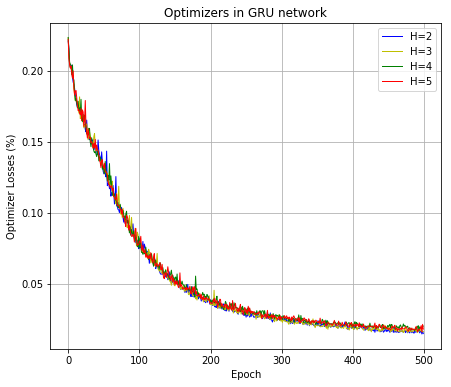

In [29]:
#Loss graph 
plt.figure(figsize=(7,6))
#plt.plot(hist3.history['loss'], 'r-', linewidth=1)
plt.plot(hist3.history['val_loss'],'B', linewidth=1)


#plt.plot(hist4.history['loss'],'k', linewidth=1)
plt.plot(hist4.history['val_loss'],'y', linewidth=1)


#plt.plot(hist5.history['loss'],'m', linewidth=1)
plt.plot(hist5.history['val_loss'],'g', linewidth=1)

#plt.plot(hist6.history['loss'],'m', linewidth=1)
plt.plot(hist6.history['val_loss'],'r', linewidth=1)

plt.title("Optimizers in GRU network")
plt.ylabel('Optimizer Losses (%)')
plt.xlabel('Epoch')
plt.legend(['H=2', 'H=3', 'H=4', 'H=5'], loc='upper right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Trackloss.png', format='png', dpi=1200)
plt.show()

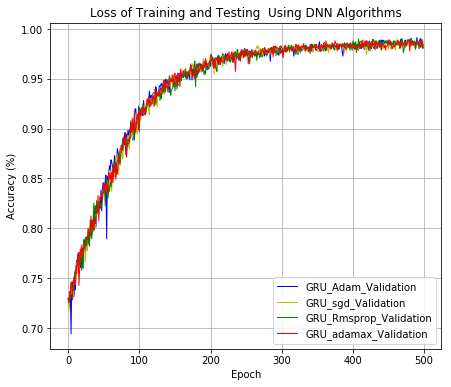

In [30]:
#Performance Graph
plt.figure(figsize=(7,6))
#plt.plot(hist1.history['acc'], 'r-', linewidth=1)
plt.plot(hist3.history['val_acc'],'B', linewidth=1)


#plt.plot(hist2.history['acc'],'k', linewidth=2)
plt.plot(hist4.history['val_acc'],'y', linewidth=1)


#plt.plot(hist3.history['acc'],'m', linewidth=2)
plt.plot(hist5.history['val_acc'],'g', linewidth=1)

plt.plot(hist6.history['val_acc'],'r', linewidth=1)


plt.title("Loss of Training and Testing  Using DNN Algorithms")
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['GRU_Adam_Validation', 'GRU_sgd_Validation', 'GRU_Rmsprop_Validation', 'GRU_adamax_Validation'], loc='lower right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Track.png', format='png', dpi=1200)
plt.show()